In [31]:
#Number of Fundings

import pandas as pd
import numpy as np

df_year_fundings = pd.read_csv('startup_funding.csv',encoding="utf8")
yrfnd = {}



for i in df_year_fundings['Date']:
    yr = i[-4:]
    if yrfnd.get(yr):
        yrfnd[yr] = yrfnd[yr] + 1
    else:
        yrfnd[yr] = 1
                
l = []      
for i in yrfnd:
    l.append(i)
l.sort()
for i in l:
    print(i, yrfnd.get(i))

2015 936
2016 993
2017 443


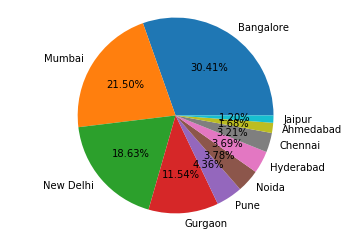

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [44]:
#Top Indian Cities

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
def getCity(location):
    location = str(location)
    if '/' in location:
        loc = location.split('/')
        location = loc[0]
   
    if location.title() == 'Delhi':
        city = 'New Delhi'
    else:
        city = location
    return city.strip().title()
 
data = pd.read_csv('startup_funding.csv',encoding="utf8")
df   = data.copy()
 
cities = df.CityLocation.apply(getCity)
 
freq = cities.value_counts(dropna=True)
i = 0
top_city = []
top_count = []
for city in freq.keys():
    if city == 'Nan':
        continue
    if i >= 10:
        break
    
    top_city.append(city)
    top_count.append(freq[city])
    i = i + 1
   
plt.pie(top_count,labels=top_city,autopct='%.2f%%')
plt.axis("equal")
plt.show()
 
for i in range(10):
    print(top_city[i],top_count[i])

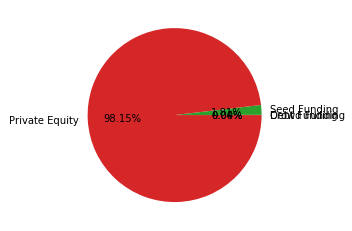

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [33]:
#Investment Type

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
def checkSpell(String):
    outStr = ''
    char ='a'
    prevchar = ''
   
    for char in String:
        if prevchar != ' ':
            if char.isupper():
                outStr = outStr + ' ' + char
            else:
                outStr = outStr + char   
        else:
            outStr = outStr + char
        prevchar = char
    return outStr.strip().title()
 
def str2int(string):
    return int(string.replace(',',''))
 
 
data = pd.read_csv('startup_funding.csv',encoding="utf8")
df   = data.copy()
 
# Handle NaN and convert String to Number
df.InvestmentType.fillna('blank',inplace=True)
df.InvestmentType = df.InvestmentType.apply(checkSpell)
df.AmountInUSD.fillna("0",inplace=True)
df['AmountInUSD'] = df.AmountInUSD.apply(str2int)
 
groupcols = df[df.InvestmentType !='Blank'].groupby(['InvestmentType'])['AmountInUSD'].sum()
groupcols = groupcols.sort_values()
total = groupcols.sum()
 
plt.axis("equal")
plt.pie(groupcols,labels=groupcols.keys(),autopct='%.2f%%')
plt.show()
 
for i in range(len(groupcols)-1,-1,-1):
    print(groupcols.keys()[i],'%.2f'%(groupcols[i]/total*100))

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


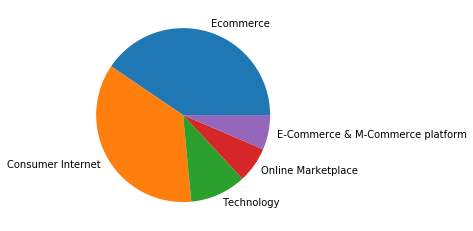

In [81]:
#Top Industries

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
data = data[["IndustryVertical","AmountInUSD"]]
data.dropna(inplace=True)
data["AmountInUSD"] = data.AmountInUSD.apply(lambda s : float(str(s).replace("," , "")))
data["IndustryVertical"] = data.IndustryVertical.str.replace("eCommerce" , "Ecommerce")
data["IndustryVertical"] = data.IndustryVertical.str.replace("ECommerce" , "Ecommerce")
data["IndustryVertical"] = data.IndustryVertical.str.replace("ecommerce" , "Ecommerce")
data.IndustryVertical.replace('ecommerce','Ecommerce',inplace=True)

data = data.groupby("IndustryVertical")["AmountInUSD"].sum().sort_values( ascending = False)[0:5]
industry = data.index.tolist()
fund = data.tolist()
total = data.sum()
perc = data.divide(total).multiply(100).tolist()

for i in range(5):
    print(industry[i] , "{:.2f}".format(perc[i]))
plt.pie(fund,labels=industry)
plt.show()

In [35]:
#Top startups

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
def checkSpell(String):
    newStr = String.replace(' ','').lower()
    if newStr == 'ola' or newStr == 'olacabs':
        String = 'Ola'
    elif newStr == 'flipkart' or newStr == 'flipkart.com':
        String = 'Flipkart'
    elif newStr == 'oyo' or newStr == 'oyorooms' or newStr=='oyoroom' or newStr=='oyofit':
        String = 'Oyo'
    elif newStr == 'paytm' or newStr == 'paytmmarketplace':
        String = 'Paytm'
    return String
    
    
def str2int(string):
    return int(string.replace(',',''))
 
 
data = pd.read_csv('startup_funding.csv',encoding="utf8")
df   = data.copy()
 
# Handle NaN and convert String to Number
df['StartupName'].fillna('blank',inplace=True)
df['StartupName'] = df['StartupName'].apply(checkSpell)
df.AmountInUSD.fillna("0",inplace=True)
df['AmountInUSD'] = df.AmountInUSD.apply(str2int)
 
groupcols = df[df['StartupName'] !='blank'].groupby(['StartupName'])['AmountInUSD'].sum()
groupcols = groupcols.sort_values()
 
for startup in groupcols.keys()[-1::-1][:5]:
    print(startup)

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [54]:
#Funding rounds

import pandas as pd
import numpy as np

df = pd.read_csv('startup_funding.csv',encoding='utf-8')
df.StartupName.replace('Flipkart.com','Flipkart',inplace=True)
df.StartupName.replace('Ola Cabs','Ola',inplace=True)
df.StartupName.replace('Olacabs','Ola',inplace=True)
df.StartupName.replace('Oyo Rooms','Oyo',inplace=True)
df.StartupName.replace('OyoRooms','Oyo',inplace=True)
df.StartupName.replace('Oyorooms','Oyo',inplace=True)
df.StartupName.replace('OYO Rooms','Oyo',inplace=True)
df.StartupName.replace('Paytm Marketplace','Paytm',inplace=True)
df.StartupName.replace("BYJU’s","Byju's",inplace=True)
freq = df.StartupName.value_counts().sort_values(ascending=False)[:5]

startup = freq.index
times_funded= freq.values

for i in range(len(startup)):
    string = str(startup[i])
    string= string.strip()
    print(startup[i],int(times_funded[i]))

Ola 9
Swiggy 7
Paytm 6
Oyo 6
UrbanClap 6


In [71]:
#Top Investor

import pandas as pd
import matplotlib.pyplot as plt
with open("startup_funding.csv",encoding="utf-8") as file_obj:
    df_start = pd.read_csv(file_obj)
    df_start.dropna(subset=['InvestorsName'],inplace=True)
    investors_dictionary={}
    for investorsName in df_start['InvestorsName']:
        for investor in investorsName.split(','):
            investor = investor.strip()
            if investor != '' and investor != 'Undisclosed Investors' and investor != 'Undisclosed investors':
                if investor in investors_dictionary:
                    investors_dictionary[investor] += 1
                else:
                    investors_dictionary[investor] = 1
top_5_investors = sorted(investors_dictionary.items(), key=lambda x: x[1],reverse=True)[0:5]
investorList = []
numberList = []
for investor in top_5_investors[0:1]:
    print(investor[0],investor[1])

Sequoia Capital 64


In [57]:
#Funding amount

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('startup_funding.csv',encoding='utf-8')

df['AmountInUSD'].fillna(0,inplace=True)

df['CityLocation'].fillna('dummy',inplace=True)
df['CityLocation'] = df.CityLocation.str.split('/',expand = True)[0]
df['CityLocation'] = df.CityLocation.str.strip()
df['CityLocation'].replace('Delhi','New Delhi',inplace = True)
df['CityLocation'].replace('bangalore','Bangalore',inplace = True)

city = np.array(df['CityLocation'])
funding= np.array(df['AmountInUSD'])

for i in range(len(funding)):
    k = str(funding[i])
    k = k.replace(',','')
    funding[i] = int(k)

out = {}
for i in range(len(funding)):
    out[city[i]] = out.get(city[i],0) + funding[i]
del(out["dummy"])
result = sorted(out.items() , reverse=True, key=lambda x: x[1])
result = result[:10]

sum_r = 0
for elem in result :
    sum_r += int(elem[1])

for elem in result :
    perc = (elem[1]/sum_r) * 100
    perc = format(perc,'.2f')
    print(elem[0],perc )

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


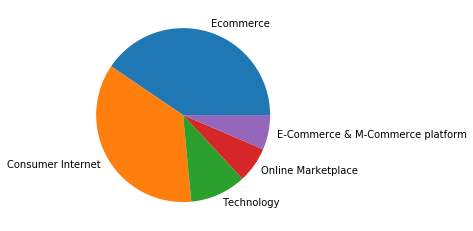

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("startup_funding.csv")
data = data[["IndustryVertical","AmountInUSD"]]
data.dropna(inplace=True)
data["AmountInUSD"] = data.AmountInUSD.apply(lambda s : float(str(s).replace("," , "")))
data["IndustryVertical"] = data.IndustryVertical.str.replace("eCommerce" , "Ecommerce")
data["IndustryVertical"] = data.IndustryVertical.str.replace("ECommerce" , "Ecommerce")
data["IndustryVertical"] = data.IndustryVertical.str.replace("ecommerce" , "Ecommerce")
data.IndustryVertical.replace('ecommerce','Ecommerce',inplace=True)

data = data.groupby("IndustryVertical")["AmountInUSD"].sum().sort_values( ascending = False)[0:5]
industry = data.index.tolist()
fund = data.tolist()
total = data.sum()
perc = data.divide(total).multiply(100).tolist()

for i in range(5):
    print(industry[i] , "{:.2f}".format(perc[i]))
plt.pie(fund,labels=industry)
plt.show()